<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/image_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-12-07 12:36:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  79.2MB/s    in 1.3s    

2024-12-07 12:36:17 (79.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import zipfile
zipfiles = zipfile.ZipFile('pizza_steak.zip')
zipfiles.extractall()

# Visualizing the data

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mlt
import random
import os
def get_image():

  plt.subplot(1,2,1)
  pizza_path = 'pizza_steak/train/pizza'

  pizza = os.listdir(pizza_path)
  pizza_image = random.choice(pizza)

  image_dir = pizza_path +'/'+pizza_image
  pizza = mlt.imread(image_dir)
  plt.imshow(pizza)
  plt.axis('off')


  plt.subplot(1,2,2)
  steak_path = 'pizza_steak/train/steak'
  steak = os.listdir(steak_path)

  steak_image = random.choice(steak)
  steak = os.listdir(steak_path)
  steak_image = random.choice(steak)

  image_dir = steak_path +'/'+steak_image
  steak = mlt.imread(image_dir)
  plt.imshow(steak)
  plt.axis('off')

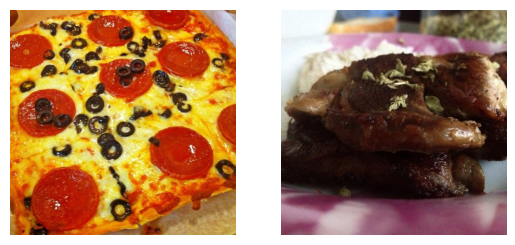

In [5]:
get_image()

# Pre-Processing the image

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [35]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(
                directory=train_dir,
                batch_size = 32,
                target_size = (224,224),
                class_mode='binary'
    )
test_data = test_datagen.flow_from_directory(
                directory = test_dir,
                batch_size = 32,
                target_size=(224,224),
                class_mode='binary'
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Model Building

In [8]:
import tensorflow as tf

In [11]:
def view_loss_curve(history_1):

  loss = history_1.history['loss']
  accuracy = history_1.history['accuracy']

  val_loss = history_1.history['val_loss']
  val_accuracy = history_1.history['val_accuracy']

  plt.plot(range(len(loss)),loss,label = 'loss')
  plt.plot(range(len(loss)),val_loss,label='val_loss')
  plt.title('Loss')
  plt.legend(loc = 'upper right')

  plt.figure()
  plt.plot(range(len(accuracy)),accuracy,label='accuracy')
  plt.plot(range(len(accuracy)),val_accuracy,label = 'val_accuracy')
  plt.title('Accuracy')
  plt.legend(loc='lower right')


In [37]:
model_1= tf.keras.models.Sequential([

    tf.keras.layers.Input(shape=(224,224,3)),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),

    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),

    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_1= model_1.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.6032 - loss: 0.6480 - val_accuracy: 0.8300 - val_loss: 0.4024
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8047 - loss: 0.4344 - val_accuracy: 0.8600 - val_loss: 0.3547
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8338 - loss: 0.3800 - val_accuracy: 0.8520 - val_loss: 0.3203
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8474 - loss: 0.3630 - val_accuracy: 0.8620 - val_loss: 0.3100
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8589 - loss: 0.3241 - val_accuracy: 0.8640 - val_loss: 0.3142


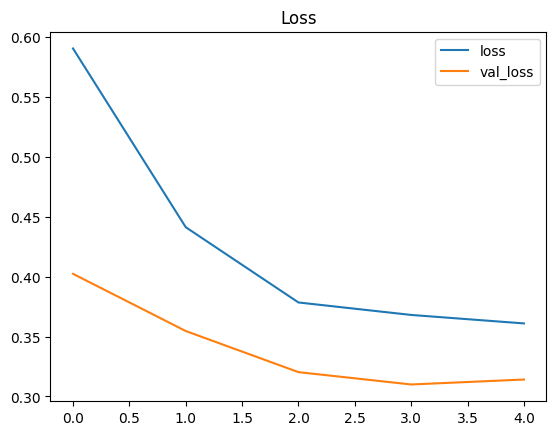

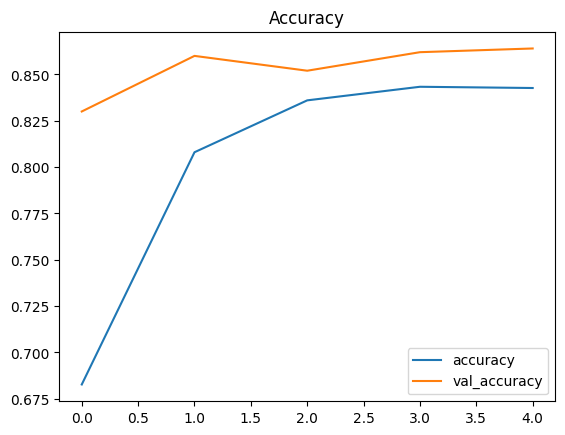

In [78]:
view_loss_curve(history_1)

# Model prediction

In [90]:
image = '/content/pizza_steak/test/steak/100274.jpg'
image = mlt.imread(image)

In [87]:
image.shape

(384, 512, 3)

In [91]:
def predicting_custom_image(image):
  img = image/255.0

  reshape_image = tf.image.resize(img,[224,224])

  processed_image = tf.expand_dims(reshape_image,axis=0)

  pred = model_1.predict(processed_image)

  prediction = ['pizza','Steak']

  result = int(tf.round(pred))

  print(prediction[result])
  plt.imshow(image)
  plt.title(prediction[result])
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Steak


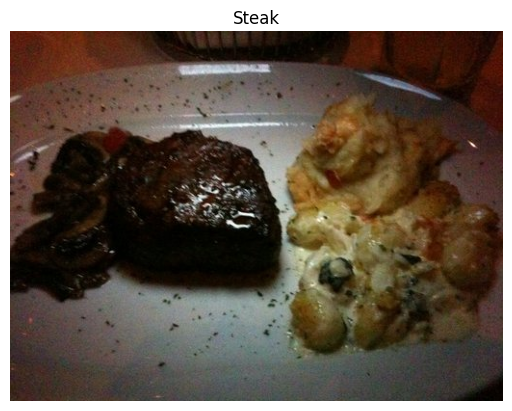

In [92]:
predicting_custom_image(image)